# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data describes the SAT participation rates, verbal and math scores for all states and DC for 2001.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data looks good and complete.

##### 3. Create a data dictionary for the dataset.

data_dictionary = {state: [list of all states], math: [all math scores], verbal: [all verbal scores], rate: [all rates]}

For example, the key 'math' maps to a list of all the math scores.

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [503]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline

In [261]:
sat_csv_path = '/users/kristensu/dropbox/ga-dsi/dsi-copy/projects/projects-weekly/project-01/assets/sat_scores.csv' 

rows = []
with open(sat_csv_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

##### 5. Print the data

In [262]:
print rows

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [263]:
header = rows[0]

In [264]:
sat_data = rows
sat_data.remove(sat_data[0])
print sat_data

[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12', '550', '550'], ['WY', '11', '547',

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [265]:
state_names = [i[0] for i in sat_data]
state_names

['CT',
 'NJ',
 'MA',
 'NY',
 'NH',
 'RI',
 'PA',
 'VT',
 'ME',
 'VA',
 'DE',
 'MD',
 'NC',
 'GA',
 'IN',
 'SC',
 'DC',
 'OR',
 'FL',
 'WA',
 'TX',
 'HI',
 'AK',
 'CA',
 'AZ',
 'NV',
 'CO',
 'OH',
 'MT',
 'WV',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS',
 'All']

##### 8. Print the types of each column

In [266]:
sat_data[0]

['CT', '82', '509', '510']

In [267]:
for i in sat_data[0]:
    print i, type(i)

CT <type 'str'>
82 <type 'str'>
509 <type 'str'>
510 <type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [268]:
###Method 1

rate = header.index('Rate')
verbal = header.index('Verbal')
math = header.index('Math')

for i in sat_data:
    i[rate] = int(i[rate])
    i[verbal] = int(i[verbal])
    i[math] = int(i[math])


In [269]:
sat_data[0:2]

[['CT', 82, 509, 510], ['NJ', 81, 499, 513]]

In [270]:
var_type = []
for i in sat_data[0]:
    var_type.append(type(i))
var_type

[str, int, int, int]

In [271]:
###Method 2
sat_data_2 = [[a[0], int(a[1]), int(a[2]),int(a[3])] for a in sat_data]
sat_data_2[0:3]

[['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515]]

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [272]:
###Method 1
state_dict = {}
for i in sat_data:
    state_dict.update({i[0]:[i[rate], i[verbal], i[math]]})

In [273]:
state_dict['CT']

[82, 509, 510]

In [274]:
###Method 2

state_dict_2 = {}
state_dict_2.update({a: [b,c,d] for [a,b,c,d] in sat_data})

In [275]:
state_dict['CT']

[82, 509, 510]

##### 11. Create a dictionary with the values for each of the numeric columns

In [289]:
###Method 1
sat_dict = {} 
for a, b in enumerate(header):
    sat_dict[b] = []
    for i in sat_data:
        sat_dict[b].append(i[a])

In [290]:
sat_dict.pop('State')

['CT',
 'NJ',
 'MA',
 'NY',
 'NH',
 'RI',
 'PA',
 'VT',
 'ME',
 'VA',
 'DE',
 'MD',
 'NC',
 'GA',
 'IN',
 'SC',
 'DC',
 'OR',
 'FL',
 'WA',
 'TX',
 'HI',
 'AK',
 'CA',
 'AZ',
 'NV',
 'CO',
 'OH',
 'MT',
 'WV',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS',
 'All']

In [291]:
sat_dict.keys()

['Math', 'Rate', 'Verbal']

In [308]:
###Method 2

sat_dict_2 = {}
new_header_list = list(enumerate(header))
new_header_list

[(0, 'State'), (1, 'Rate'), (2, 'Verbal'), (3, 'Math')]

In [309]:
for a, b in new_header_list:
    sat_dict_2[b] = []
    for i in sat_data:
        sat_dict_2[b].append((i[a]))
sat_dict_2.pop('State')

In [310]:
sat_dict.keys()

['Math', 'Rate', 'Verbal']

In [311]:
sat_dict_2['Verbal'][0:3]

[509, 499, 511]

In [314]:
print sat_dict

{'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506]}


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [325]:
###Method 1

for key in sat_dict:
    print key + ' ' + 'min', min(sat_dict[key])
    print key + ' ' + 'max', max(sat_dict[key])
    print ''

Math min 439
Math max 603

Rate min 4
Rate max 82

Verbal min 482
Verbal max 593



In [316]:
###Method 2

print 'Math min:', min(sat_dict['Math'])
print 'Math max: ', max(sat_dict['Math'])
print ''
print 'Verbal min:', min(sat_dict['Verbal'])
print 'Verbal max: ', max(sat_dict['Verbal'])
print ''
print 'Rate min:', min(sat_dict['Rate'])
print 'Rate max: ', max(sat_dict['Rate'])


Math min: 439
Math max:  603

Verbal min: 482
Verbal max:  593

Rate min: 4
Rate max:  82


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [352]:
###
###SD = sqrt[(Sum(x-mean)^2)/ n -1]
key_mean = {}
for key in sat_dict:
    key_mean.update({key: float(sum(sat_dict[key]))/len(sat_dict[key])})

In [ ]:
###Method 1

rate = sat_dict['Rate']
math = sat_dict['Math']
verbal = sat_dict['Verbal']

def find_sd(some_list):
    key_mean = float(sum(some_list))/len(some_list)
    variance_squares = [(i - key_mean) ** 2 for i in some_list]
    sum_squares = sum(variance_squares)
    sd = (sum_squares/(len(some_list)-1)) ** 0.5
    return sd

In [420]:
print 'Standard Deviation for Rate is: ', find_sd(rate)
print 'Standard Deviation for Math is: ', find_sd(math)
print 'Standard Deviation for Verbal is: ', find_sd(verbal)

Standard Deviation for Rate is:  27.3017880729
Standard Deviation for Math is:  36.0149750989
Standard Deviation for Verbal is:  33.2362254438


In [425]:
###Method 2

key_sd = [np.std(np.array(sat_dict[key])) for key in sat_dict]
key_sd

[35.666996164305949, 27.037996494523586, 32.915094961603266]

In [426]:
###Method 3

for key in sat_dict:
    sat_array = np.array(sat_dict[key])
    key_sd = np.std(sat_array)
    print key_sd

35.6669961643
27.0379964945
32.9150949616


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

In [462]:
import matplotlib.pyplot as plt
%matplotlib inline

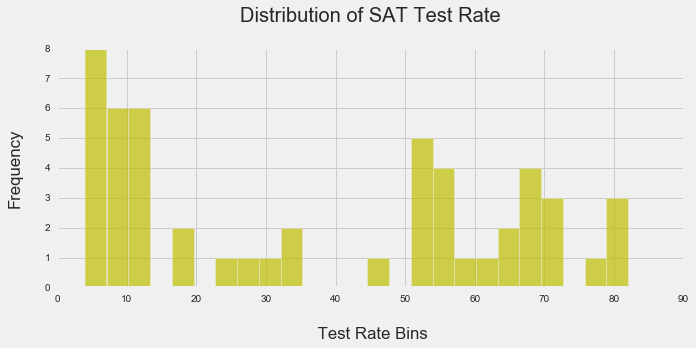

In [539]:
plt.figure(figsize=(10,4))
n, bins, patches = plt.hist(sat_dict['Rate'], bins = 25, facecolor = 'y', alpha=.7)

plt.xlabel('\n Test Rate Bins')
plt.ylabel('Frequency\n')
plt.title('Distribution of SAT Test Rate\n')

##### 15. Plot the Math distribution

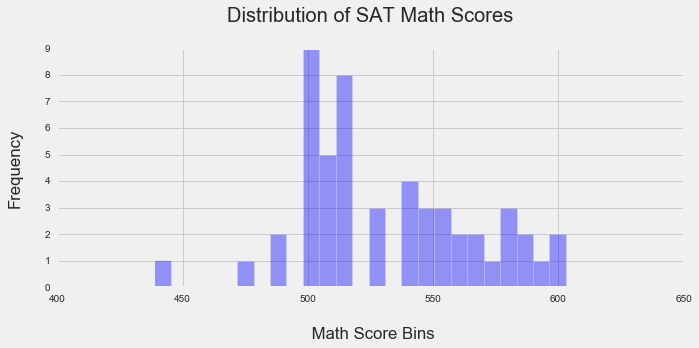

In [545]:
plt.figure(figsize=(10,4))
n, bins, patches = plt.hist(sat_dict['Math'], bins = 25, facecolor = 'b', alpha=.4)

plt.xlabel('\n Math Score Bins')
plt.ylabel('Frequency\n')
plt.title('Distribution of SAT Math Scores\n')

##### 16. Plot the Verbal distribution

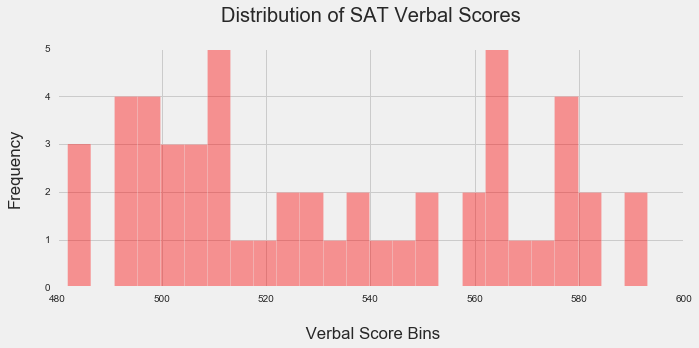

In [541]:
plt.figure(figsize=(10,4))
n, bins, patches = plt.hist(sat_dict['Verbal'], bins = 25, facecolor = 'r', alpha=.4)

plt.xlabel('\n Verbal Score Bins')
plt.ylabel('Frequency\n')
plt.title('Distribution of SAT Verbal Scores\n')

##### 17. What is the typical assumption for data distribution?

In [501]:
print 'Typical assumption is a normal distribution. See example below.'

Typical assumption is a normal distribution. See example below.


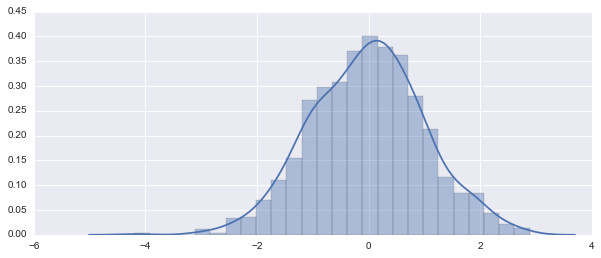

In [506]:
plt.figure(figsize=(10,4))
a = np.random.randn(1000)
sns.distplot(a)

##### 18. Does that distribution hold true for our data?

In [507]:
print 'Not really. Definitely not for Verbal.'

Not really. Definitely not for Verbal.


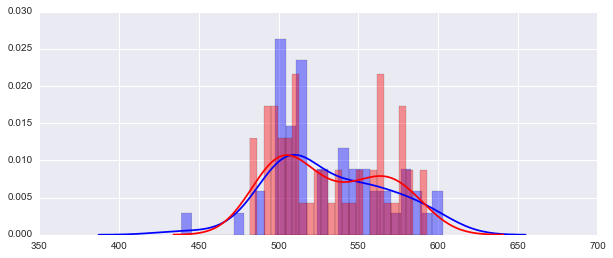

In [500]:
plt.figure(figsize=(10,4))
sns.distplot(sat_dict['Math'], bins = 25, color ='blue')
sns.distplot(sat_dict['Verbal'], bins = 25, color='red')

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

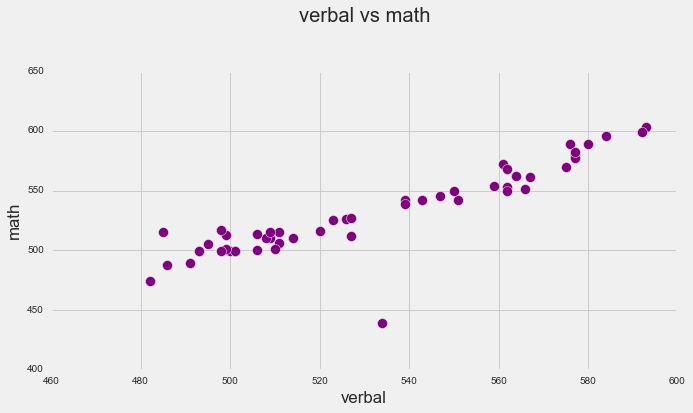

In [546]:
plt.style.use('fivethirtyeight')

verbal_math = plt.figure(figsize = (10, 5))
axes = verbal_math.gca()
axes.scatter(verbal, math, c = 'purple', s = 100)
axes.set_title('verbal vs math\n\n')
axes.set_xlabel('verbal')
axes.set_ylabel('math')

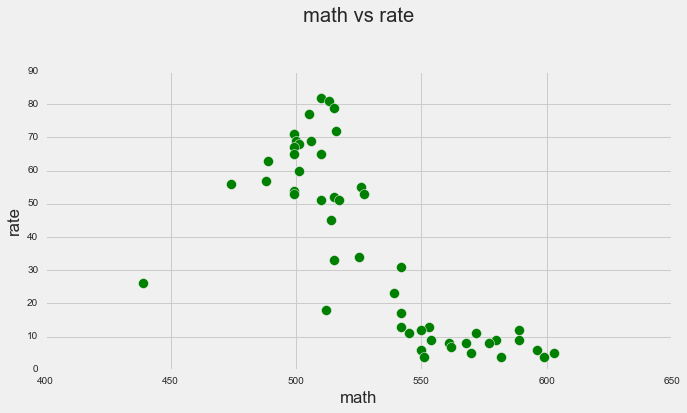

In [547]:
math_rate = plt.figure(figsize = (10, 5))
axes = math_rate.gca()
axes.scatter(math, rate, c = 'green', s = 100)
axes.set_title('math vs rate\n\n')
axes.set_xlabel('math')
axes.set_ylabel('rate')



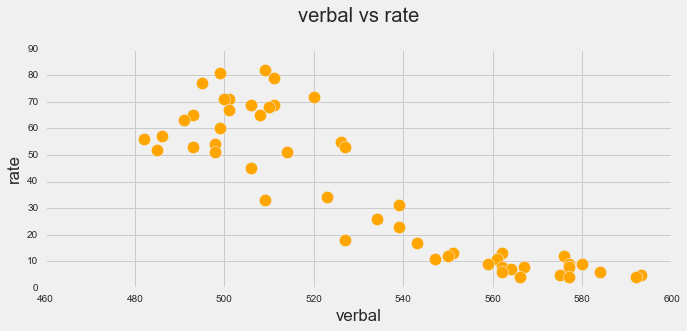

In [548]:
verbal_rate = plt.figure(figsize = (10, 4))
axes = verbal_rate.gca()
axes.scatter(verbal, rate, c = 'orange', s = 150)
axes.set_title('verbal vs rate\n')
axes.set_xlabel('verbal')
axes.set_ylabel('rate')

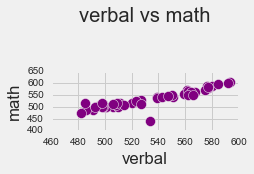

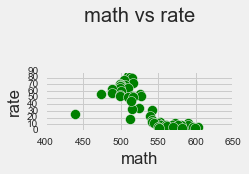

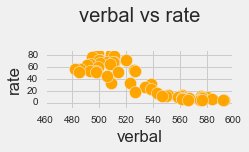

In [549]:
plt.style.use('fivethirtyeight')

verbal_math = plt.figure(figsize = (3, 1))
axes = verbal_math.gca()
axes.scatter(verbal, math, c = 'purple', s = 100)
axes.set_title('verbal vs math\n\n')
axes.set_xlabel('verbal')
axes.set_ylabel('math')

math_rate = plt.figure(figsize = (3, 1))
axes = math_rate.gca()
axes.scatter(math, rate, c = 'green', s = 100)
axes.set_title('math vs rate\n\n')
axes.set_xlabel('math')
axes.set_ylabel('rate')

verbal_rate = plt.figure(figsize = (3, 1))
axes = verbal_rate.gca()
axes.scatter(verbal, rate, c = 'orange', s = 150)
axes.set_title('verbal vs rate\n')
axes.set_xlabel('verbal')
axes.set_ylabel('rate')

##### 20. Are there any interesting relationships to note?

In [559]:
print "There appears to be a strong correlations between math and verbal, a moderate correlation between verbal \
and rate and a weak one between math and rate."

There appears to be a strong correlations between math and verbal, a moderate correlation between verbal and rate and a weak one between math and rate.


##### 21. Create box plots for each variable. 

{'boxes': [<matplotlib.lines.Line2D at 0x12a4ba1d0>],
 'caps': [<matplotlib.lines.Line2D at 0x12a4c7110>,
 'fliers': [<matplotlib.lines.Line2D at 0x12a4d1410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12a4c7d90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12a4ba3d0>,
  <matplotlib.lines.Line2D at 0x12a4baa90>]}

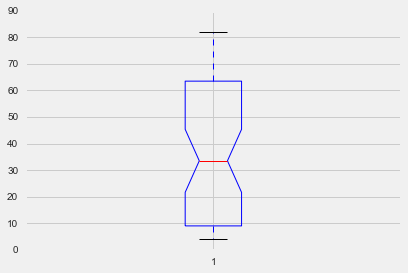

In [560]:
plt.boxplot(rate, sat_dict)

{'boxes': [<matplotlib.lines.Line2D at 0x12a6f10d0>],
 'caps': [<matplotlib.lines.Line2D at 0x12a6f1fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12a70a310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12a6fec90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12a6f12d0>,
  <matplotlib.lines.Line2D at 0x12a6f1990>]}

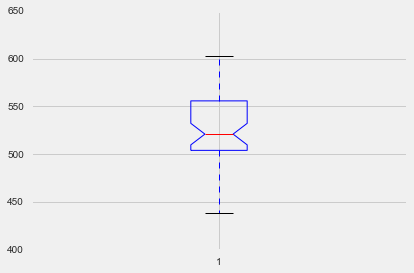

In [562]:
plt.boxplot(math, sat_dict)

{'boxes': [<matplotlib.lines.Line2D at 0x12a579ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x12a587e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x12a59f150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12a592ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12a587110>,
  <matplotlib.lines.Line2D at 0x12a5877d0>]}

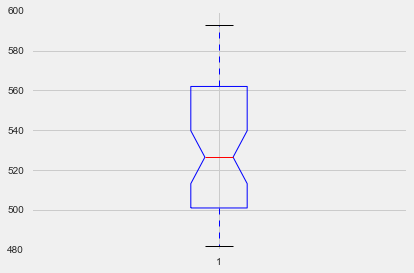

In [561]:
plt.boxplot(verbal, sat_dict)

{'boxes': [<matplotlib.lines.Line2D at 0x12ce294d0>],
 'caps': [<matplotlib.lines.Line2D at 0x12ce39410>,
 'fliers': [<matplotlib.lines.Line2D at 0x12ce45710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12ce450d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12ce296d0>,
  <matplotlib.lines.Line2D at 0x12ce29d90>]}

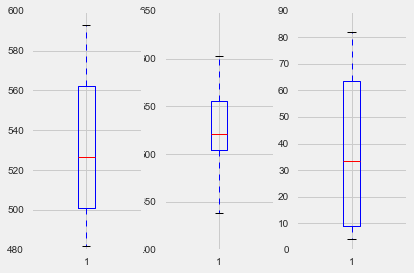

In [578]:
###Method 1

box = plt.figure()

rate_ax = box.add_subplot(133)
rate_ax.boxplot(sat_dict['Rate'])

math_ax = box.add_subplot(132)
math_ax.boxplot(sat_dict['Math'])

verbal_ax = box.add_subplot(131)
verbal_ax.boxplot(sat_dict['Verbal'])

{'boxes': [<matplotlib.lines.Line2D at 0x12621be10>],
 'caps': [<matplotlib.lines.Line2D at 0x127465a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1278e9110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12b121c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12c775e10>,
  <matplotlib.lines.Line2D at 0x127465410>]}

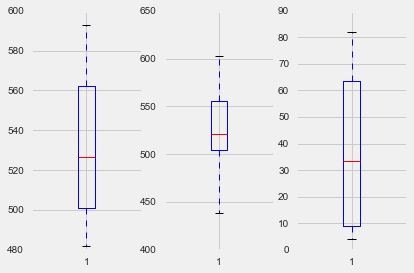

In [599]:
###Method 2

fig, ax = plt.subplots(1,3)
ax[0].boxplot(sat_dict['Verbal'])
ax[1].boxplot((sat_dict['Math']))
ax[2].boxplot((sat_dict['Rate']))

{'boxes': [<matplotlib.lines.Line2D at 0x12ca9b210>],
 'caps': [<matplotlib.lines.Line2D at 0x12ca19090>,
 'fliers': [<matplotlib.lines.Line2D at 0x12ca6a350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12cc8bdd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12ca19a90>,
  <matplotlib.lines.Line2D at 0x12ca194d0>]}

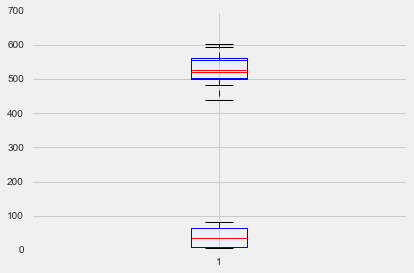

In [600]:
###Method 3 (just messing around)

fig, ax = plt.subplots()
plt.boxplot(sat_dict['Verbal'])
plt.boxplot((sat_dict['Math']))
plt.boxplot((sat_dict['Rate']))

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 